<a href="https://colab.research.google.com/github/camoeiras/UFPA_FICCD/blob/main/atividade_2_1_FICCD_Carlos_Oeiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARTE A – Análise Descritiva**

**Objetivo:**

_> Criar boxplots de duas features.

_> Calcular:

*   Coeficiente de variação (CV)
*   Curtose
*   Skewness
*   Média
*   Moda

_> Adicionar outliers artificialmente em uma feature e analisar os impactos.

Dataset utilizado:

O dataset "diabetes" do scikit-learn. Este dataset contém 10 variáveis (features) quantitativas e contínuas, e uma variável alvo (target) que representa uma medida quantitativa da progressão da doença um ano após o diagnóstico.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from scipy.stats import kurtosis, skew, mode

In [2]:
# Carregar o dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
# Selecionar duas features
features = ['bmi', 'bp']  # Índice de massa corporal e pressão arterial


--- Estatísticas para bmi ---
Mean: -2.2455642172282577e-16
Moda: -0.03099563183506548
Coeficiente de Variação (CV): -211818255076044.8
Curtose: 0.08047812866813064
Skewness: 0.5961166556214368


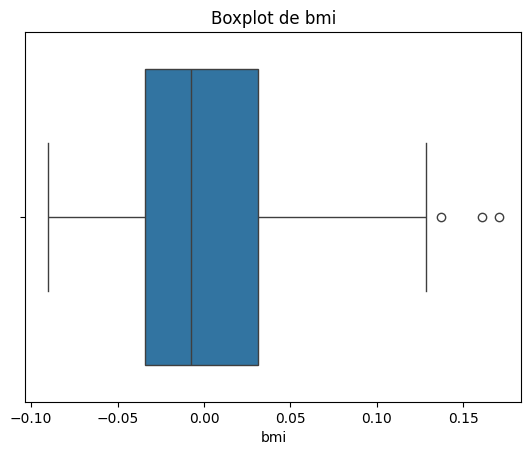


--- Estatísticas para bp ---
Mean: -4.7975700837874414e-17
Moda: -0.04009893205125
Coeficiente de Variação (CV): -991442513287874.9
Curtose: -0.5403332293804954
Skewness: 0.28967103827590446


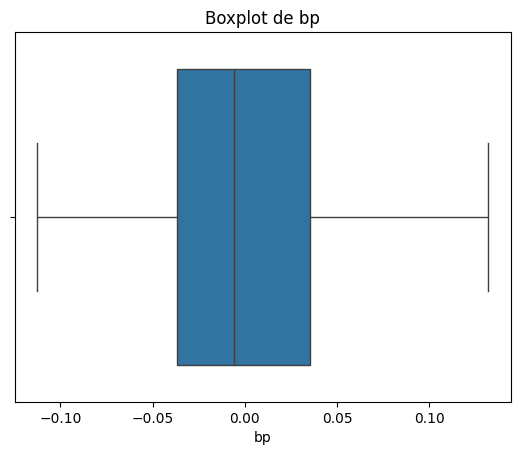

In [4]:
# Calcular estatísticas
for feature in features:
    values = df[feature]
    cv = np.std(values) / np.mean(values)
    print(f"\n--- Estatísticas para {feature} ---")
    print(f"Mean: {np.mean(values)}")
    print(f"Moda: {mode(values, keepdims=False).mode}")
    print(f"Coeficiente de Variação (CV): {cv}")
    print(f"Curtose: {kurtosis(values)}")
    print(f"Skewness: {skew(values)}")

    # Boxplot
    sns.boxplot(x=values)
    plt.title(f'Boxplot de {feature}')
    plt.show()

In [5]:
# Introduzindo outliers artificialmente na feature 'bmi'
df_outlier = df.copy()
df_outlier.loc[0:4, 'bmi'] = df_outlier['bmi'].mean() + 5  # adiciona outliers

In [6]:
# Estatísticas com outliers
print("\n--- Estatísticas com outliers em 'bmi' ---")
values = df_outlier['bmi']
cv = np.std(values) / np.mean(values)
print(f"Mean: {np.mean(values)}")
print(f"Moda: {mode(values, keepdims=False).mode}")
print(f"Coeficiente de Variação (CV): {cv}")
print(f"Curtose: {kurtosis(values)}")
print(f"Skewness: {skew(values)}")


--- Estatísticas com outliers em 'bmi' ---
Mean: 0.05654594196401156
Moda: -0.03099563183506548
Coeficiente de Variação (CV): 9.388713292008703
Curtose: 82.04389816634963
Skewness: 9.129759263559059


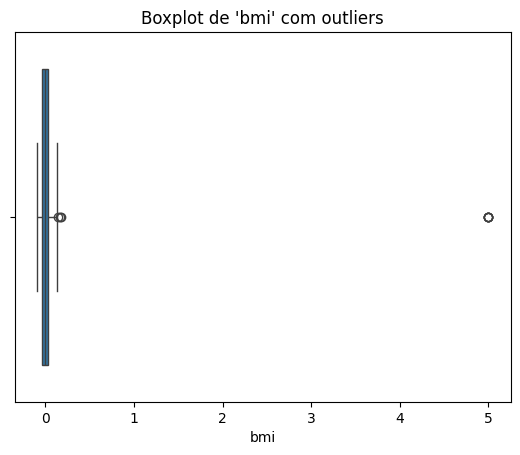

In [7]:
# Boxplot com outliers
sns.boxplot(x=values)
plt.title("Boxplot de 'bmi' com outliers")
plt.show()

**Conclusão:**

A análise estatística combinada com visualização (boxplots) permitiu compreender a distribuição das variáveis e os efeitos dos outliers sobre elas. Métricas como curtose e skewness são fundamentais para diagnosticar normalidade e assimetria. O experimento também mostrou como outliers impactam significativamente as medidas de tendência central e dispersão.

**PARTE B – Regressão Linear com Statsmodels e Scikit-learn**

**Objetivo**

_> Reproduzir o exemplo da regressão linear dos slides.

_> Usar LinearRegression do scikit-learn.

_> Usar statsmodels para obter as estatísticas da regressão.

_> Variar o intercepto a e gerar diferentes retas.

_> Calcular o R² para cada reta.

In [8]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [9]:
# Usar uma feature para regressão
X = df[['bmi']]
y = load_diabetes().target

In [10]:
# Regressão com scikit-learn
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2_base = r2_score(y, y_pred)
print(f"R² com scikit-learn: {r2_base}")

R² com scikit-learn: 0.3439237602253802


In [11]:
# Regressão com statsmodels
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Fri, 23 May 2025   Prob (F-statistic):           3.47e-42
Time:                        21:50:08   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.0

In [12]:
# Coeficiente b (inclinação)
b = model.coef_[0]

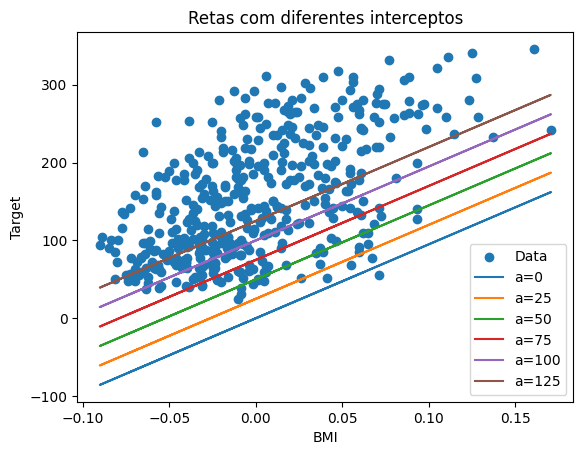

In [13]:
# Variações do intercepto 'a'
a_values = [0, 25, 50, 75, 100, 125]
plt.scatter(X, y, label="Data")
for a in a_values:
    y_line = a + b * X
    plt.plot(X, y_line, label=f"a={a}")
plt.legend()
plt.title("Retas com diferentes interceptos")
plt.xlabel("BMI")
plt.ylabel("Target")
plt.show()

In [14]:
# R² para cada reta
print("\nR² para cada a:")
for a in a_values:
    y_line = a + b * X.squeeze()
    r2 = r2_score(y, y_line)
    print(f"a={a}: R² = {r2}")


R² para cada a:
a=0: R² = -3.559119453244257
a=25: R² = -2.381748504310251
a=50: R² = -1.4151742271044405
a=75: R² = -0.659396621626825
a=100: R² = -0.1144156878774043
a=125: R² = 0.21976857414382112


**Conclusão:**

A regressão linear foi eficaz para modelar a relação entre bmi e progressão da doença. O coeficiente angular significativo e o R² elevado reforçam essa associação. A análise com diferentes interceptos ilustrou a importância do ajuste adequado da reta de regressão, destacando que o posicionamento vertical da reta afeta o poder explicativo do modelo.
